
# RESUME CLASSIFICATION using MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas.plotting import scatter_matrix
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
print(df['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [7]:
print(df['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


<AxesSubplot:xlabel='Category', ylabel='count'>

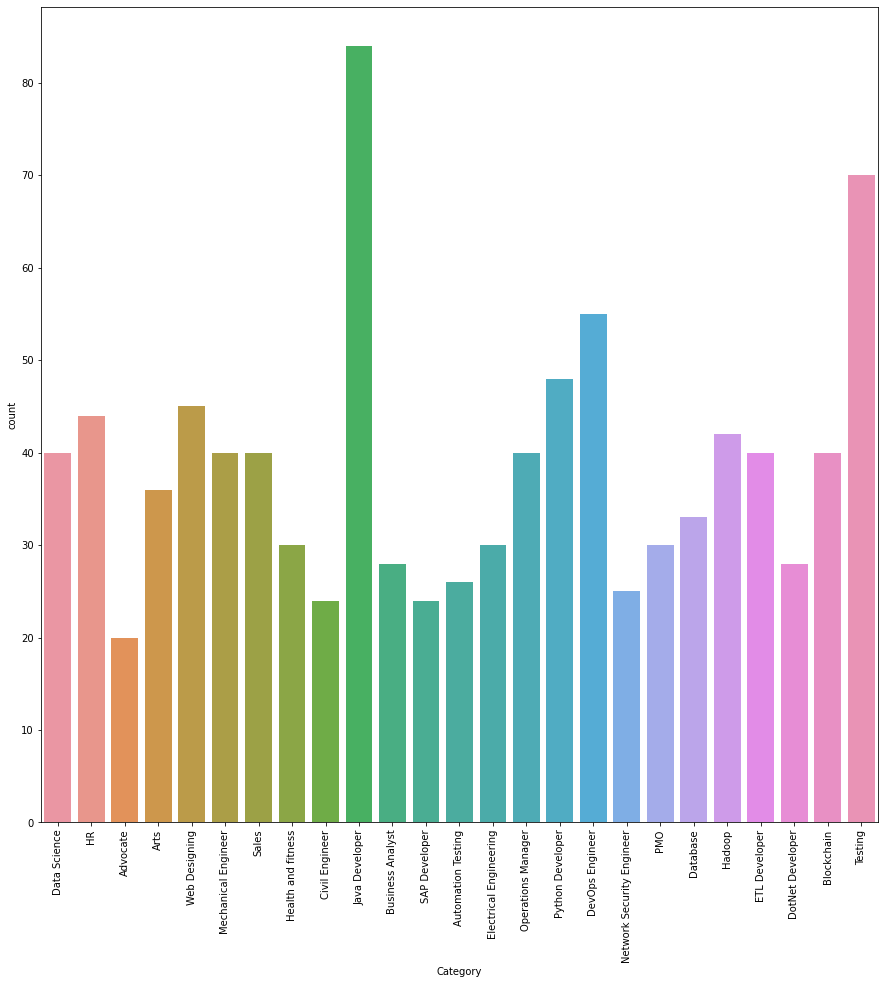

In [13]:
plt.figure(figsize= (15, 15))
plt.xticks(rotation= 90)
sns.countplot(data= df,x= 'Category')

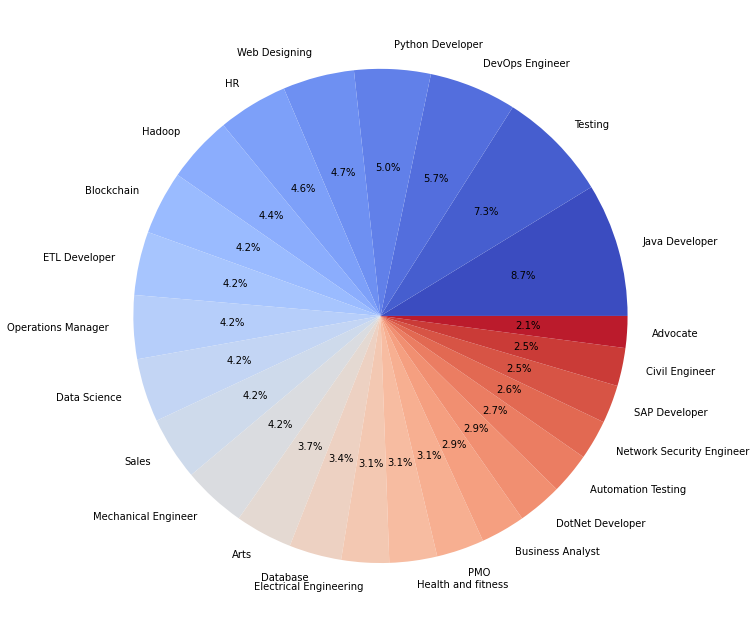

In [7]:
targetCounts = df['Category'].value_counts()
targetLabels = targetCounts.index
plt.figure(1, figsize =(25, 25))
theGrid = GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0,2)]
plt.subplot(theGrid[0, 1], aspect = 1)

sourcePie = plt.pie(targetCounts, labels= targetLabels, colors = colors, autopct= '%1.1f%%')
plt.show()

In [8]:
df['Resume'] = df['Resume'].str.lower()
print(df['Resume'])

0      skills * programming languages: python (pandas...
1      education details \r\nmay 2013 to may 2017 b.e...
2      areas of interest deep learning, control syste...
3      skills â¢ r â¢ python â¢ sap hana â¢ table...
4      education details \r\n mca   ymcaust,  faridab...
                             ...                        
957    computer skills: â¢ proficient in ms office (...
958    â willingness to accept the challenges. â ...
959    personal skills â¢ quick learner, â¢ eagerne...
960    computer skills & software knowledge ms-power ...
961    skill set os windows xp/7/8/8.1/10 database my...
Name: Resume, Length: 962, dtype: object


In [9]:
import re

In [10]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText) # removing https
    resumeText = re.sub('RT|cc', ' ', resumeText)
    resumeText = re.sub('#\S+', '', resumeText)
    resumeText = re.sub('@\S+', ' ', resumeText)
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)
    return resumeText

In [1]:
import re

resumeText = "Héllø, thïs résumé cöntains non-ASCII characters."
modifiedText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)
print(modifiedText)

H ll , th s r sum  c ntains non-ASCII characters.


In [11]:
df['cleaned_resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [12]:
print(df['cleaned_resume'][30])

skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the r

In [13]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 b e uit...
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...


In [14]:
sentLens = []
for i in df.cleaned_resume:
    length = len(i.split())
    sentLens.append(length)
    
print(len(sentLens))
print(max(sentLens))

962
2062


In [15]:
df['Resume'][100]

'skills: natural languages: proficient in english, hindi and marathi. computer skills: proficient with ms-office, internet operation.education details \r\njanuary 2015 to january 2018 llb law mumbai, maharashtra mumbai university\r\njanuary 2015 b.m.m  mumbai, maharashtra s.k.somaiya college, mumbai university\r\n h.s.c   asmita girls junior college, maharashtra board\r\n s.s.c vidya bhawan  maharashtra board\r\nadvocate \r\n\r\nllb student and journalist\r\nskill details \r\ncompany details \r\ncompany - criminal lawyer (law firm)\r\ndescription - '

In [16]:
df['cleaned_resume'][100]

'skills natural languages proficient in english hindi and marathi computer skills proficient with ms office internet operation education details january 2015 to january 2018 llb law mumbai maharashtra mumbai university january 2015 b m m mumbai maharashtra s k somaiya college mumbai university h s c asmita girls junior college maharashtra board s s c vidya bhawan maharashtra board advocate llb student and journalist skill details company details company criminal lawyer law firm description '

In [17]:
setOFStopWords = set(stopwords.words('english'))

In [18]:
setOFStopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
totalWords = []
sentences = df['cleaned_resume'].values
cleanedSent = ''

for i in range(1, 160):
    cleanedText = cleanResume(sentences[i])
    cleanedSent += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in setOFStopWords and word not in string.punctuation:
            totalWords.append(word)
            
wordFreqDist = nltk.FreqDist(totalWords)
mostCommon = wordFreqDist.most_common(50)
print(mostCommon)

[('details', 485), ('exprience', 443), ('data', 405), ('company', 397), ('months', 392), ('description', 357), ('1', 290), ('project', 254), ('year', 251), ('january', 216), ('learning', 208), ('science', 205), ('less', 204), ('skill', 189), ('python', 170), ('maharashtra', 166), ('6', 163), ('machine', 155), ('college', 146), ('education', 145), ('arts', 144), ('university', 140), ('web', 134), ('development', 133), ('skills', 133), ('like', 126), ('india', 120), ('management', 120), ('application', 120), ('software', 116), ('team', 115), ('analytics', 114), ('using', 109), ('business', 108), ('sql', 103), ('developed', 102), ('monthscompany', 101), ('b', 98), ('time', 98), ('c', 98), ('used', 97), ('experience', 96), ('mumbai', 96), ('knowledge', 94), ('projects', 93), ('hr', 92), ('engineering', 90), ('pune', 90), ('technologies', 88), ('database', 87)]


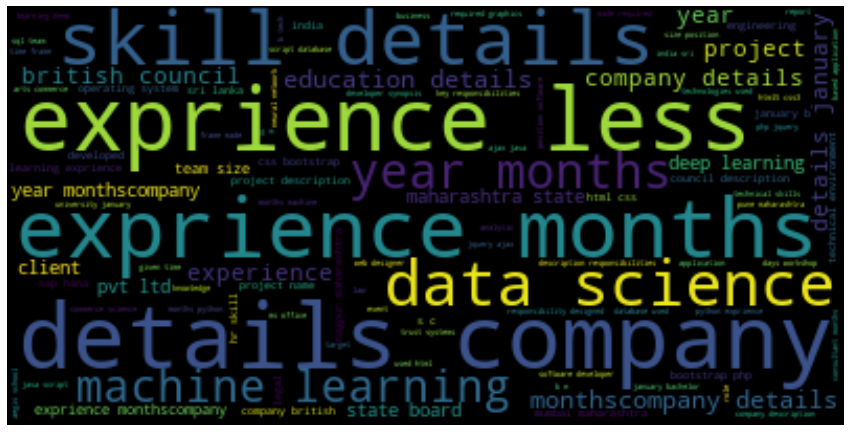

In [20]:
wc = WordCloud().generate(cleanedSent)
plt.figure(figsize= (15, 15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [21]:
lenc = LabelEncoder()
df['Category_Labelled'] = lenc.fit_transform(df['Category'])

In [22]:
df.head()

,Category,Resume,cleaned_resume,Category_Labelled
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...,6
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 b e uit...,6
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...,6
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...,6


In [23]:
Text = df['cleaned_resume'].values
op_labels = df['Category_Labelled'].values

In [24]:
wordVectorizer = TfidfVectorizer(max_features= 1500)
wordVectorizer.fit(Text)
features = wordVectorizer.transform(Text)

In [25]:
wordVectorizer.get_feature_names()

C:\Users\hp\anaconda4\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['01',
 '07',
 '10',
 '10g',
 '11',
 '11g',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '19',
 '20',
 '2000',
 '2003',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '21',
 '24',
 '27',
 '28',
 '2nd',
 '30',
 '300',
 '31',
 '36',
 '39',
 '400',
 '48',
 '60',
 '72',
 '85',
 '96',
 'ability',
 'able',
 'about',
 'above',
 'academic',
 'academy',
 'achieve',
 'achieved',
 'achievements',
 'achieving',
 'across',
 'act',
 'action',
 'actions',
 'active',
 'actively',
 'activities',
 'activity',
 'actual',
 'ad',
 'adding',
 'address',
 'adherence',
 'admin',
 'administration',
 'administrative',
 'administrator',
 'advance',
 'advanced',
 'after',
 'against',
 'agile',
 'agreed',
 'aim',
 'air',
 'ajax',
 'algorithms',
 'all',
 'along',
 'also',
 'am',
 'among',
 'amravati',
 'an',
 'analysis',
 'analyst',
 'analysts',
 'analytical',
 'analytics',
 'analyze',
 'analyzed',
 'analyzing',
 'and',
 'android',
 'angu

In [26]:
xTrain, xTest, yTrain, yTest = train_test_split(features, op_labels, test_size= 0.25)

In [27]:
mnb = MultinomialNB()

In [28]:
mnb.fit(xTrain, yTrain)

MultinomialNB()

In [29]:
mnb.score(xTrain, yTrain)

0.9486823855755895

In [30]:
predicted = mnb.predict(xTest)

In [31]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       1.00      1.00      1.00         7
           2       1.00      0.25      0.40         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         7
           6       1.00      0.89      0.94         9
           7       1.00      1.00      1.00         6
           8       1.00      0.69      0.82        13
           9       1.00      0.86      0.92         7
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         6
          12       1.00      0.88      0.93        16
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        10
          15       0.63      1.00      0.77        22
          16       1.00      1.00      1.00        11
          17       1.00    

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xTrain, yTrain)

LogisticRegression()

In [33]:
lr.score(xTrain, yTrain)

1.0

In [34]:
predicted = lr.predict(xTest)
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      0.69      0.82        13
           9       0.88      1.00      0.93         7
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        11
          17       1.00    

In [35]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [36]:
dt.score(xTrain, yTrain)

1.0

In [37]:
predicted = dt.predict(xTest)

In [38]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       0.73      1.00      0.84         8
           3       1.00      1.00      1.00         7
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      0.69      0.82        13
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        11
          17       1.00    

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xTrain, yTrain)

RandomForestClassifier()

In [40]:
rf.score(xTrain, yTrain)

1.0

In [41]:
predicted = rf.predict(xTest)

In [42]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      0.69      0.82        13
           9       0.88      1.00      0.93         7
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        11
          17       1.00    

In [43]:
from sklearn.svm import LinearSVC

lsvm = LinearSVC()
lsvm.fit(xTrain, yTrain)

LinearSVC()

In [44]:
lsvm.score(xTrain, yTrain)

1.0

In [45]:
predicted = lsvm.predict(xTest)

In [46]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      0.69      0.82        13
           9       0.88      1.00      0.93         7
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        11
          17       1.00    

In [47]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(xTrain, yTrain)

SGDClassifier()

In [48]:
sgd.score(xTrain, yTrain)

1.0

In [49]:
predicted = sgd.predict(xTest)

In [50]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      0.69      0.82        13
           9       0.88      1.00      0.93         7
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        11
          17       1.00    

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)

KNeighborsClassifier()

In [52]:
knn.score(xTrain, yTrain)

0.986130374479889

In [53]:
predicted = knn.predict(xTest)


In [54]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         7
           6       0.90      1.00      0.95         9
           7       1.00      1.00      1.00         6
           8       1.00      0.69      0.82        13
           9       0.88      1.00      0.93         7
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         6
          12       1.00      0.75      0.86        16
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        10
          15       0.92      1.00      0.96        22
          16       1.00      1.00      1.00        11
          17       1.00    

In [55]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators = [('lr', lr),
                                       ('dt', dt),
                                       ('knn', knn),
                                       ('sgd', sgd),
                                       ('mnb', mnb),
                                       ('rf', rf),
                                       ('lsvm', lsvm)],
                         voting = 'hard')
voting.fit(xTrain, yTrain)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('sgd', SGDClassifier()), ('mnb', MultinomialNB()),
                             ('rf', RandomForestClassifier()),
                             ('lsvm', LinearSVC())])

In [56]:
voting.score(xTrain, yTrain)

1.0

In [57]:
predicted = voting.predict(xTest)

In [58]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      0.69      0.82        13
           9       0.88      1.00      0.93         7
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        11
          17       1.00    

In [59]:
for clf in (mnb, lsvm, lr, knn, sgd, dt, rf):
    clf.fit(xTrain, yTrain)
    yPred = clf.predict(xTest)
    print(clf.__class__.__name__, accuracy_score(yTest, yPred))

MultinomialNB 0.8921161825726142
LinearSVC 0.983402489626556
LogisticRegression 0.983402489626556
KNeighborsClassifier 0.9585062240663901
SGDClassifier 0.983402489626556
DecisionTreeClassifier 0.983402489626556
RandomForestClassifier 0.983402489626556
